# Loading Data and Importing Libraries 

In [1]:
pip install transformers

     |████████████████████████████████| 2.9 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 45.6 MB/s 
     |████████████████████████████████| 636 kB 33.3 MB/s 
     |████████████████████████████████| 3.3 MB 40.4 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier


from transformers import pipeline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Project/Dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv", low_memory=False)
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,NaN,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [5]:
df.shape

(5000, 24)

In [6]:
df2 = pd.read_csv('/content/drive/MyDrive/Machine Learning/Project/Dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', low_memory=False)

In [7]:
df2.shape

(28332, 24)

In [8]:
data = pd.concat([df, df2], ignore_index=True)
data.shape

(33332, 25)

# EDA

In [9]:
data.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'reviews.didPurchase'],
      dtype='object')

In [10]:
data.dtypes

id                      object
dateAdded               object
dateUpdated             object
name                    object
asins                   object
brand                   object
categories              object
primaryCategories       object
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
reviews.date            object
reviews.dateAdded       object
reviews.dateSeen        object
reviews.doRecommend     object
reviews.id             float64
reviews.numHelpful     float64
reviews.rating           int64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
sourceURLs              object
reviews.didPurchase     object
dtype: object

In [11]:
data.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,reviews.didPurchase
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0.0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,NaN
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,NaN
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0.0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,NaN
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,NaN,2018-10-09T00:00:00Z,True,177283626.0,3.0,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,NaN
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0.0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,NaN


In [12]:
data.tail()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,reviews.didPurchase
33327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2016-12-07T00:00:00.000Z,NaN,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...,NaN
33328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2017-01-20T00:00:00.000Z,NaN,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,http://reviews.bestbuy.com/3545/5620410/review...,NaN
33329,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2017-01-30T00:00:00.000Z,NaN,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,http://reviews.bestbuy.com/3545/5620410/review...,NaN
33330,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2017-02-17T00:00:00.000Z,NaN,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,http://reviews.bestbuy.com/3545/5620410/review...,NaN
33331,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2016-12-23T00:00:00.000Z,NaN,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,"At ninety dollars, the expectionations are low...",You get what your paying for,Hung,http://reviews.bestbuy.com/3545/5620410/review...,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33332 entries, 0 to 33331
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33332 non-null  object 
 1   dateAdded            33332 non-null  object 
 2   dateUpdated          33332 non-null  object 
 3   name                 33332 non-null  object 
 4   asins                33332 non-null  object 
 5   brand                33332 non-null  object 
 6   categories           33332 non-null  object 
 7   primaryCategories    33332 non-null  object 
 8   imageURLs            33332 non-null  object 
 9   keys                 33332 non-null  object 
 10  manufacturer         33332 non-null  object 
 11  manufacturerNumber   33332 non-null  object 
 12  reviews.date         33332 non-null  object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     33332 non-null  object 
 15  reviews.doRecommend  21086 non-null 

In [14]:
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,7.000000e+01,21115.000000,33332.000000
mean,1.847802e+08,0.477954,4.526461
std,2.221998e+07,8.303597,0.907859
min,1.082112e+08,0.000000,1.000000
25%,1.845218e+08,0.000000,4.000000
50%,1.881057e+08,0.000000,5.000000
75%,1.987643e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [15]:
data.head().isnull()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,reviews.didPurchase
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True


In [16]:
data.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateAdded      32280
reviews.dateSeen           0
reviews.doRecommend    12246
reviews.id             33262
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title             13
reviews.username           0
sourceURLs                 0
reviews.didPurchase    33323
dtype: int64

In [17]:
data['id'].value_counts()

AVpgNzjwLJeJML43Kpxn    8343
AVpe7xlELJeJML43ypLz    3728
AVqkIhxunnc1JgDc3kg_    2443
AVqVGWQDv8e3D1O-ldFr    2370
AVph0EeEilAPnD_x9myq    1986
                        ... 
AVpiZQ8r1cnluZ0-M3MN       1
AVzvV7FHglJLPUi8GzhD       1
AVzoFq6UvKc47QAVe9NB       1
AV2ElNnuvKc47QAVouhY       1
AVpe5Q3sLJeJML43xt5X       1
Name: id, Length: 69, dtype: int64

In [18]:
data['id'].unique()

array(['AVqVGZNvQMlgsOJE6eUY', 'AWFUWc8THh53nbDRF6YO',
       'AWK8z0pOIwln0LfXlSxH', 'AV-XeQLWuC1rwyj_gbP5',
       'AWMjT0WguC1rwyj_rFh3', 'AVpfIfGA1cnluZ0-emyp',
       'AVph0EeEilAPnD_x9myq', 'AVqVGZSEQMlgsOJE6eUc',
       'AVpgdkC8ilAPnD_xsvyi', 'AVqVGWLKnnc1JgDc3jF1',
       'AVqkIhkhv8e3D1O-lebZ', 'AVqkIh9HQMlgsOJE6fu_',
       'AVpfpK8KLJeJML43BCuD', 'AVpidLjVilAPnD_xEVpI',
       'AVqVGZO3nnc1JgDc3jGK', 'AVphPmHuilAPnD_x3E5h',
       'AVqkIhwDv8e3D1O-lebb', 'AVpjEN4jLJeJML43rpUe',
       'AVpftoij1cnluZ0-p5n2', 'AVqkIj9snnc1JgDc3khU',
       'AVqVGZN9QMlgsOJE6eUZ', 'AVqkIh8WQMlgsOJE6fu-',
       'AVqkIiKWnnc1JgDc3khH', 'AVqkIdZiv8e3D1O-leaJ',
       'AVpgNzjwLJeJML43Kpxn', 'AVpe7nGV1cnluZ0-aG2o',
       'AVpfl8cLLJeJML43AE3S', 'AWYAV-i9Iwln0LfXqrUq',
       'AWFFfd9KIwln0LfXiOe0', 'AVpe7xlELJeJML43ypLz',
       'AVphC37X1cnluZ0-9mbp', 'AVpf68A5ilAPnD_xkjSq',
       'AVpe6nyKLJeJML43yOe2', 'AVpflnS7ilAPnD_xehxE',
       'AVpfzuRNilAPnD_xipqB', 'AVpfhcniLJeJML43-t4G',
       'AW

In [19]:
data['dateAdded'].value_counts()

2015-10-30T08:59:32Z    8343
2017-03-03T16:55:53Z    3799
2015-12-03T01:23:41Z    3728
2017-01-11T06:58:33Z    3662
2017-03-06T14:59:43Z    3240
2016-06-08T03:50:06Z    1454
2016-04-10T22:00:34Z    1395
2017-06-24T05:30:23Z    1013
2017-03-06T14:59:25Z     846
2017-01-04T03:51:17Z     826
2018-02-02T02:30:22Z     650
2018-05-02T14:01:51Z     590
2016-03-31T21:08:24Z     587
2017-03-06T14:59:44Z     579
2017-05-20T01:34:04Z     526
2017-03-03T16:56:06Z     446
2017-03-03T16:56:05Z     347
2017-03-06T14:59:52Z     209
2016-08-01T02:44:31Z     205
2018-04-13T02:03:15Z     196
2017-06-22T02:09:02Z     160
2017-03-06T14:59:42Z     118
2017-06-24T05:30:24Z      82
2015-12-09T08:57:06Z      61
2015-12-02T05:30:10Z      58
2017-11-03T23:17:55Z      26
2015-05-11T12:33:03Z      25
2015-01-22T12:25:23Z      21
2017-06-28T15:41:38Z      13
2015-12-01T05:29:38Z      12
2015-10-30T10:58:06Z       9
2015-11-06T02:16:04Z       9
2018-06-13T19:37:34Z       7
2018-11-24T02:10:04Z       7
2018-01-30T04:

In [20]:
data['dateUpdated'].value_counts()

2019-04-25T09:08:16Z    8343
2019-03-09T07:13:43Z    4301
2019-04-24T02:17:42Z    3728
2019-02-23T02:49:38Z    2443
2019-02-25T02:23:15Z    1569
                        ... 
2019-04-25T08:39:23Z       1
2019-02-25T02:20:02Z       1
2019-03-26T16:55:27Z       1
2019-04-18T09:31:54Z       1
2019-03-09T07:21:48Z       1
Name: dateUpdated, Length: 69, dtype: int64

In [21]:
data['name'].value_counts()

AmazonBasics AAA Performance Alkaline Batteries (36 Count)                               8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary           3728
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers        2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black    2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case                   1986
                                                                                         ... 
Echo Dot (Previous generation)                                                              1
Two Door Top Load Pet Kennel Travel Crate Dog Cat Pet Cage Carrier Box Tray 23"             1
Amazon Echo Show - Black                                                                    1
AmazonBasics Nespresso Pod Storage Drawer - 50 Capsule Capacity                             1
AmazonBasics Single-Door Folding Metal Dog Crate - Large (42

In [22]:
data['name'].unique()

array(['Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)',
       'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
       'Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player',
       'Amazon - Echo Plus w/ Built-In Hub - Silver',
       'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue',
       'Amazon Tap - Alexa-Enabled Portable Bluetooth Spe

In [23]:
data['asins'].value_counts()

B00QWO9P0O,B00LH3DMUO               8343
B00QWO9P0O,B01IB83NZG,B00MNV8E0C    3728
B018T075DC                          2443
B018SZT3BK,B01AHB9CN2               2370
B018Y22C2Y                          1986
                                    ... 
B00QAVO43C                             1
B00OP6SMCI                             1
B00VKTZFB4                             1
B01L7XWEQQ                             1
B010RLCH2U                             1
Name: asins, Length: 70, dtype: int64

In [24]:
data['asins'].unique()

array(['B00ZV9PXP2', 'B010CEHQTG', 'B01J24C0TI', 'B01N32NCPM',
       'B06XB29FPF', 'B00QFQRELG', 'B018Y22C2Y', 'B017JG41PC',
       'B018Y22BI4', 'B018Y23MNM', 'B01AHBBG04', 'B01AHBDCKQ',
       'B01BH83OOM', 'B0189XYY0Q', 'B00VINDBJK', 'B00IOY8XWQ',
       'B01AHB9CN2', 'B018Y225IA', 'B00IOYAM4I', 'B01AHB9C1E',
       'B00REQKWGA', 'B01ACEKAJY', 'B01AHB9CYG', 'B018Y224PY',
       'B00QWO9P0O,B00LH3DMUO', 'B00DIHVMEA,B00EZ1ZTV0',
       'B01E6AO69U,B00L9EPT8O', 'B073SQYXTW', 'B00ZV9RDKK',
       'B00QWO9P0O,B01IB83NZG,B00MNV8E0C', 'B00WRDS8H0',
       'B00EEBS9O0,B01CHQHIJK', 'B01B66989K,B00CD8ADKO,B00LA9H6UM',
       'B00DUGZFWY', 'B00F5CKWBA,B00KPQCWAU',
       'B0002LCUZK,B010CEC6MI,B01B25NN64', 'B074MCBG25,B075357QFB',
       'B006GWO7UA', 'B01L7XWEQQ', 'B006BGZJJ4', 'B00Y3QOH5G',
       'B00NH144GK,B00LA9H1E8', 'B00OP6SMCI', 'B00BGIQS1A', 'B006LW0W5Y',
       'B0751RGYJV', 'B010RLCH2U', 'B01GAGYVU2', 'B0752151W6',
       'B018SZT3BK,B01AHB9CN2', 'B018Y226XO', 'B01IO618J8',
      

In [25]:
data['brand'].value_counts()

Amazon          21153
Amazonbasics    12169
AmazonBasics       10
Name: brand, dtype: int64

In [26]:
data['primaryCategories'].value_counts()

Electronics                    17271
Health & Beauty                12071
Toys & Games,Electronics        1676
Electronics,Hardware            1435
Office Supplies,Electronics      651
Electronics,Media                209
Office Supplies                    9
Animals & Pet Supplies             6
Electronics,Furniture              2
Home & Garden                      2
Name: primaryCategories, dtype: int64

In [27]:
data['manufacturer'].value_counts()

Amazon                     21130
AmazonBasics               12179
Amazon Digital Services       18
Amazon.com                     5
Name: manufacturer, dtype: int64

In [28]:
data['reviews.doRecommend'].value_counts()

True     20118
False      968
Name: reviews.doRecommend, dtype: int64

In [29]:
data['manufacturerNumber'].value_counts()

HL-002619           8343
LR6G0748FFPAB-US    3728
53-004484           3167
53-004485           2443
53-004755           1986
                    ... 
53-003736              1
9001-42A               1
AOKE-16082501          1
DHCD002                1
6009-S                 1
Name: manufacturerNumber, Length: 74, dtype: int64

In [30]:
data['reviews.date'].value_counts()

2017-01-23T00:00:00.000Z    657
2017-01-06T00:00:00.000Z    631
2017-01-18T00:00:00.000Z    545
2017-01-16T00:00:00.000Z    537
2016-12-23T00:00:00.000Z    449
                           ... 
2018-10-15T00:00:00.000Z      1
2015-04-25T00:00:00.000Z      1
2017-11-25T17:10:08.000Z      1
2019-03-03T00:00:00.000Z      1
2018-07-09T00:00:00.000Z      1
Name: reviews.date, Length: 1355, dtype: int64

In [31]:
data['reviews.dateSeen'].value_counts()

2017-08-28T00:00:00Z                                                                                                                                                       8343
2017-06-28T00:00:00Z                                                                                                                                                       3728
2017-04-30T00:00:00Z,2017-06-07T00:00:00Z                                                                                                                                  2950
2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017-04-26T00:00:00Z,2017-08-06T00:00:00Z,2017-05-10T00:00:00Z,2017-08-09T00:00:00Z                                              1650
2017-04-26T00:00:00Z,2017-06-04T00:00:00Z,2017-06-03T00:00:00Z                                                                                                             1492
                                                                                                                        

In [32]:
data['reviews.rating'].unique()

array([3, 5, 4, 1, 2])

In [33]:
data.rename(columns={'reviews.rating': 'rating', 'reviews.doRecommend': 'doRecommend', 'reviews.numHelpful': 'numHelpful'}, inplace=True)

In [34]:
pd.crosstab(data.doRecommend, data.primaryCategories,values=data.numHelpful,aggfunc=np.average)

primaryCategories,Electronics,"Electronics,Furniture","Electronics,Hardware","Electronics,Media","Office Supplies,Electronics","Toys & Games,Electronics"
doRecommend,,,,,,
False,0.565891,NaN,1.100000,2.375000,0.100000,0.468750
True,0.312749,0.0,0.095307,2.766169,0.443535,0.096835


In [35]:
data.corr()

,reviews.id,numHelpful,rating
reviews.id,1.000000,-0.545113,0.330520
numHelpful,-0.545113,1.000000,-0.041512
rating,0.330520,-0.041512,1.000000


In [36]:
np.var(data)

doRecommend            4.379976e-02
reviews.id             4.866745e+14
numHelpful             6.894646e+01
rating                 8.241828e-01
reviews.didPurchase    9.876543e-02
dtype: float64

In [37]:
np.std(data)

doRecommend            2.092839e-01
reviews.id             2.206070e+07
numHelpful             8.303400e+00
rating                 9.078451e-01
reviews.didPurchase    3.142697e-01
dtype: float64

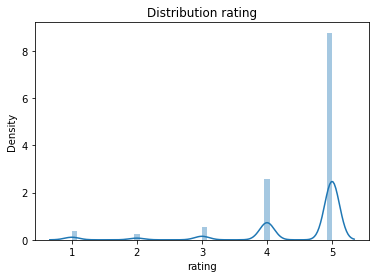

In [38]:
sns.distplot(data.rating)
plt.title("Distribution rating")
plt.show()

In [39]:
g1 = data.groupby('brand')

In [40]:
g1. describe()

reviews.id                             ... rating          
                  count         mean           std  ...    50%  75%  max
brand                                               ...                 
Amazon             70.0  184780236.0  2.221998e+07  ...    5.0  5.0  5.0
AmazonBasics        0.0          NaN           NaN  ...    4.0  5.0  5.0
Amazonbasics        0.0          NaN           NaN  ...    5.0  5.0  5.0

[3 rows x 24 columns]

In [41]:
g1.rating.mean()

brand
Amazon          4.570699
AmazonBasics    4.300000
Amazonbasics    4.449749
Name: rating, dtype: float64

In [42]:
data.skew(axis = 0, skipna = True)

doRecommend            -4.339799
reviews.id             -1.999438
numHelpful             49.183322
rating                 -2.381658
reviews.didPurchase    -3.000000
dtype: float64

In [43]:
data.kurt(axis = 0, skipna = True)

doRecommend              16.835450
reviews.id                3.667570
numHelpful             2931.976910
rating                    5.639944
reviews.didPurchase       9.000000
dtype: float64

# Preprocessing

In [44]:
data.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,doRecommend,reviews.id,numHelpful,rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,reviews.didPurchase
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0.0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,NaN
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,NaN
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0.0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,NaN


In [45]:
data.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateAdded      32280
reviews.dateSeen           0
doRecommend            12246
reviews.id             33262
numHelpful             12217
rating                     0
reviews.sourceURLs         0
reviews.text               0
reviews.title             13
reviews.username           0
sourceURLs                 0
reviews.didPurchase    33323
dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33332 entries, 0 to 33331
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33332 non-null  object 
 1   dateAdded            33332 non-null  object 
 2   dateUpdated          33332 non-null  object 
 3   name                 33332 non-null  object 
 4   asins                33332 non-null  object 
 5   brand                33332 non-null  object 
 6   categories           33332 non-null  object 
 7   primaryCategories    33332 non-null  object 
 8   imageURLs            33332 non-null  object 
 9   keys                 33332 non-null  object 
 10  manufacturer         33332 non-null  object 
 11  manufacturerNumber   33332 non-null  object 
 12  reviews.date         33332 non-null  object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     33332 non-null  object 
 15  doRecommend          21086 non-null 

In [47]:
data.drop('reviews.didPurchase', inplace=True, axis=1)

In [48]:
data.drop('keys', inplace=True, axis=1)

In [49]:
data.drop('reviews.dateAdded', inplace=True, axis=1)

In [50]:
data.drop('categories', inplace=True, axis=1)

In [51]:
data.drop('sourceURLs', inplace=True, axis=1)

In [52]:
data.drop('reviews.sourceURLs', inplace=True, axis=1)

In [53]:
data.drop('reviews.id', inplace=True, axis=1)

In [54]:
data.drop('imageURLs', inplace=True, axis=1)

In [55]:
data.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
primaryCategories         0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateSeen          0
doRecommend           12246
numHelpful            12217
rating                    0
reviews.text              0
reviews.title            13
reviews.username          0
dtype: int64

In [56]:
k = np.array(data.select_dtypes(include = 'object').columns)

for i in k:
  if i not in ['manufacturerNumber', 'reviews.username']:
    data[i] = data[i].replace(r'^\d+$', np.nan, regex = True)

data.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
primaryCategories         0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateSeen          0
doRecommend           12246
numHelpful            12217
rating                    0
reviews.text              1
reviews.title            13
reviews.username          0
dtype: int64

In [57]:
k = np.array(df.select_dtypes(include = 'number').columns)

for i in k:
  df[i] = df[i].replace(r'^[A-Za-z]+', np.nan, regex = True)

data.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
primaryCategories         0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateSeen          0
doRecommend           12246
numHelpful            12217
rating                    0
reviews.text              1
reviews.title            13
reviews.username          0
dtype: int64

In [58]:
ind_1 = data[data['reviews.text'].isnull()].index
print(ind_1)
data.drop(ind_1, axis = 0, inplace = True)

data.reset_index(drop = True, inplace = True)

data['reviews.text'].isnull().sum()

Int64Index([12590], dtype='int64')


0

In [59]:
data.shape

(33331, 17)

In [60]:
#droping missingvalue rows

ind = data[ data['reviews.title'].isnull()].index
data.drop(ind, axis =0, inplace = True)

data.reset_index(drop = True, inplace = True)

data['reviews.title'].isnull().sum()

0

In [61]:
data.shape

(33318, 17)

In [62]:
data['doRecommend'].value_counts()

True     20106
False      967
Name: doRecommend, dtype: int64

In [63]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
val = imputer.fit_transform(np.array(data['doRecommend']).reshape(-1, 1))

val = pd.DataFrame(val)
data['doRecommend'] = val[0]

data['doRecommend'].value_counts()

True     32351
False      967
Name: doRecommend, dtype: int64

In [64]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
val = imputer.fit_transform(np.array(data['numHelpful']).reshape(-1, 1))

val = pd.DataFrame(val)
data['numHelpful'] = val[0]

data['numHelpful'].isnull().sum()

0

In [65]:
lower_bound = 0
upper_bound = 5
x = data[(data['rating'] < lower_bound) | (data['rating'] > upper_bound)].index
print(len(x))

0


# Visualisation 

## distribution plot

In [66]:
x1 = sns.FacetGrid(data, row='numHelpful', height=10, aspect=4)
x1 = x1.map(sns.distplot, 'rating', color='cyan')
plt.show()

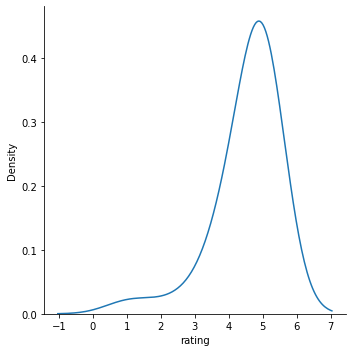

In [67]:
sns.displot(data=data,x='rating', kind='kde',bw_adjust=6)

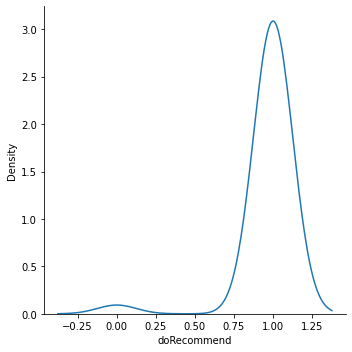

In [68]:
sns.displot(data=data,x='doRecommend', kind='kde',bw_adjust=6)

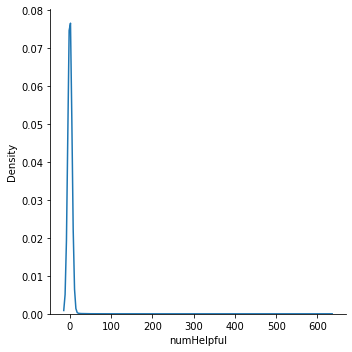

In [69]:
sns.displot(data=data,x='numHelpful', kind='kde',bw_adjust=6)

## count plot

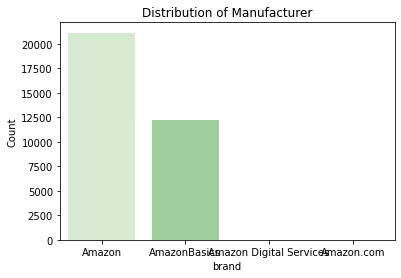

In [70]:
sns.countplot(data['manufacturer'], palette='Greens')

plt.title('Distribution of Manufacturer')
plt.xlabel('brand')
plt.ylabel('Count')
plt.show()

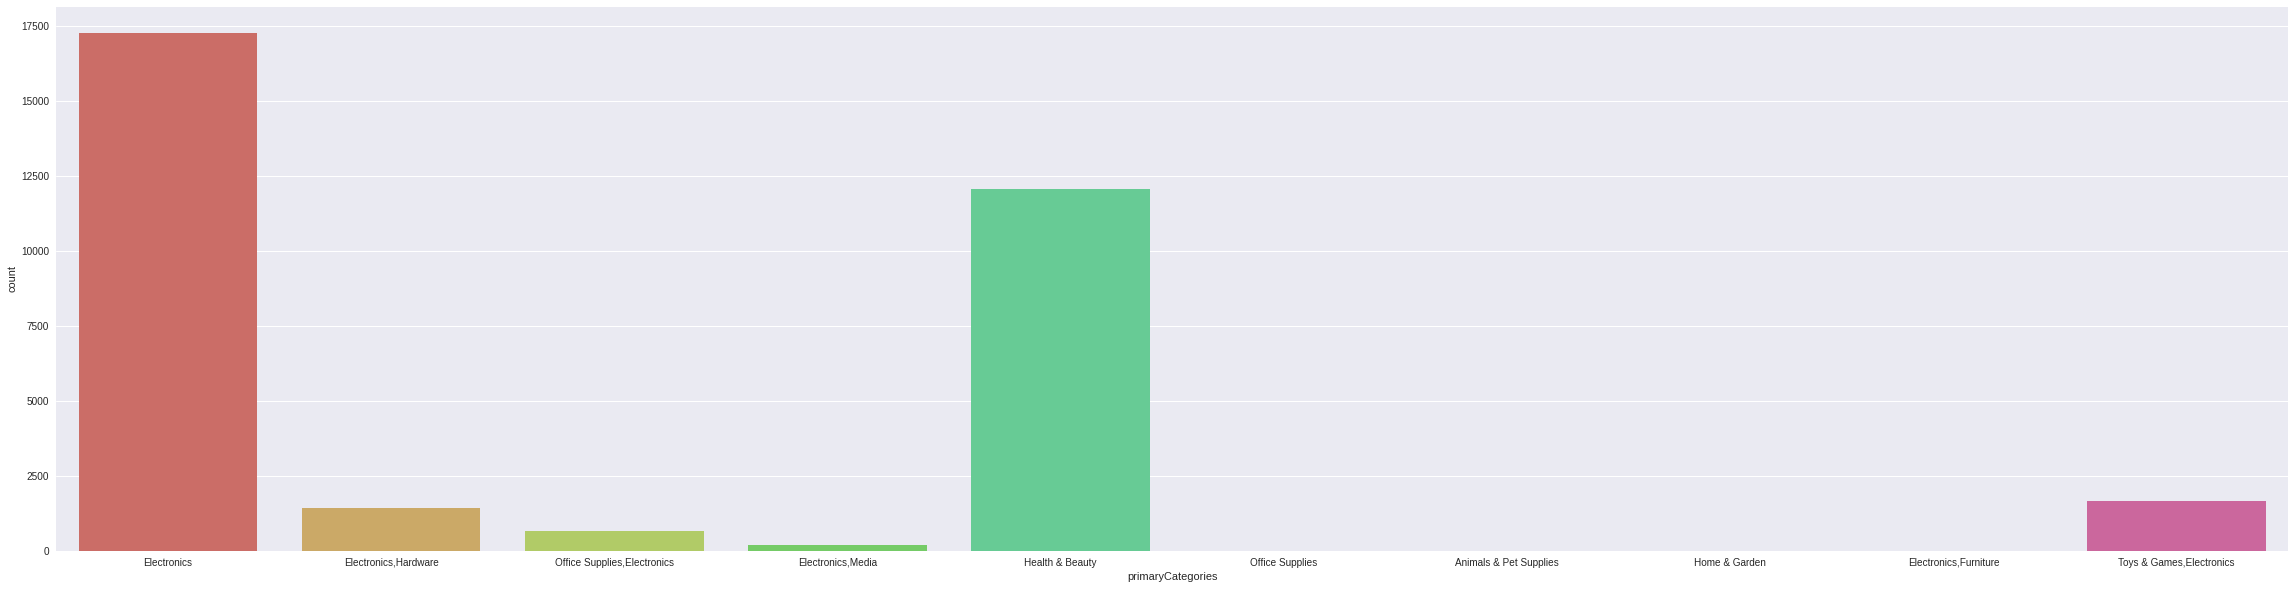

In [71]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(40,10))
sns.countplot(data["primaryCategories"], palette="hls");

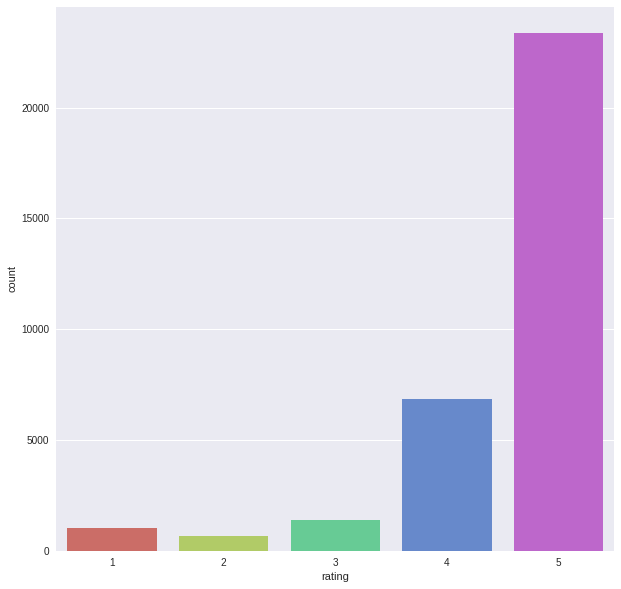

In [72]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(data["rating"], palette="hls");

In [73]:
data['brand']=data['brand'].replace({'AmazonBasics':'Amazonbasics'})

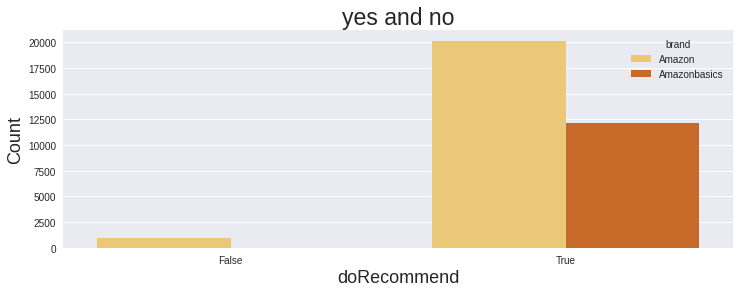

In [74]:
plt.figure(figsize=(12,4))
sns.countplot(x='doRecommend', data=data, hue='brand', palette='YlOrBr') 
plt.title('yes and no', size='23')
plt.ylabel('Count',size=18)
plt.xlabel('doRecommend',size=18)
plt.show()

## scatter plot

Text(0.5, 1.0, 'Scatter plot of brand vs primaryCategories')

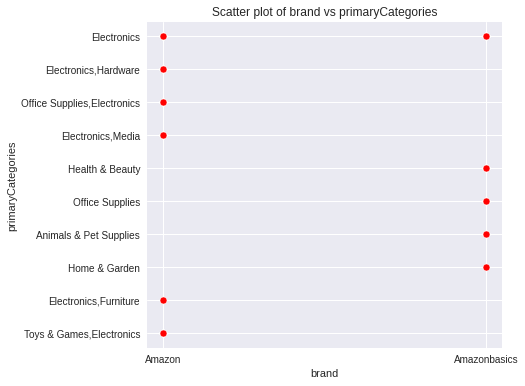

In [75]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='brand',y='primaryCategories',data=data,color='red')
ax.set_title('Scatter plot of brand vs primaryCategories')

## strip plot

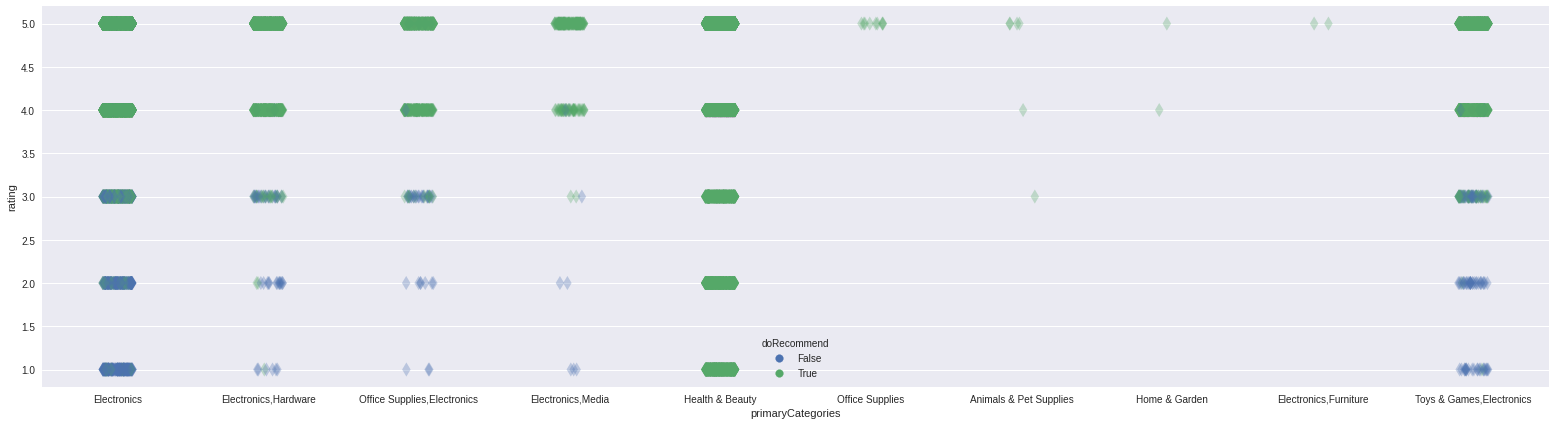

In [76]:
plt.figure(figsize=(27,7))
sns.stripplot(x= "primaryCategories", y = "rating", hue="doRecommend", size=10, data = data,marker= 'd',alpha=0.3)
plt.show()

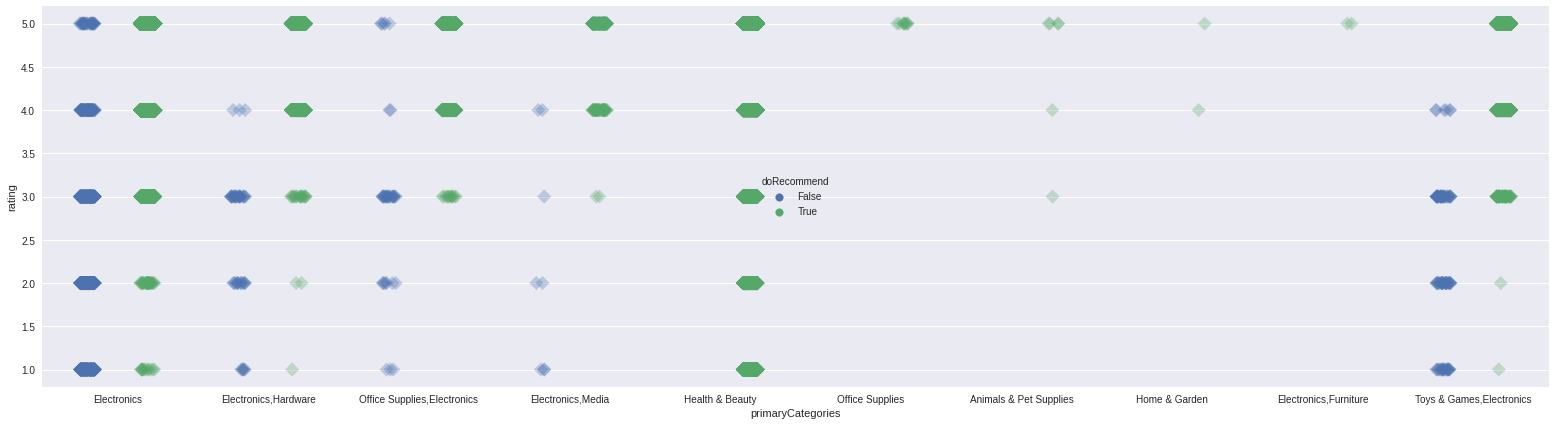

In [77]:
plt.figure(figsize=(27,7))
sns.stripplot(x= "primaryCategories", y = "rating", hue="doRecommend",dodge=True, size=10, data = data,marker= 'D',alpha=0.3)
plt.show()

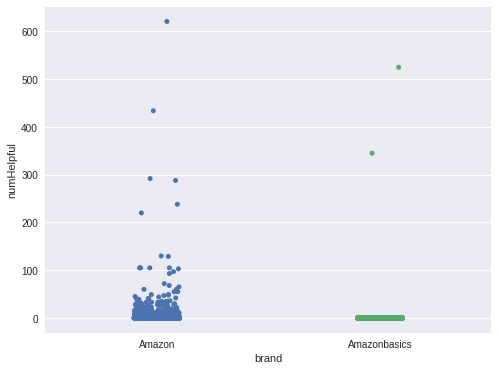

In [78]:
plt.figure(figsize=(8,6))

sns.stripplot(x=data.brand,y= data.numHelpful)

## pie chart

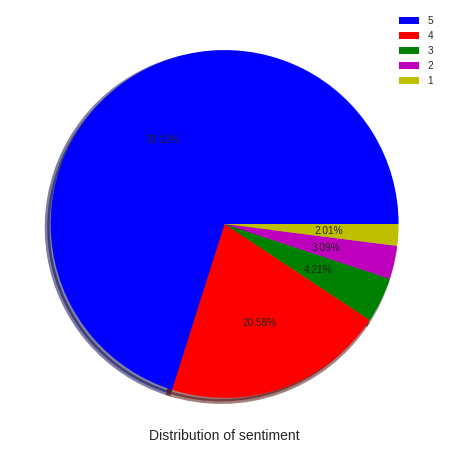

In [79]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['5', '4','3','2','1']
colors = ['b','r','g','m','y']
plt.pie(data['rating'].value_counts(), autopct='%0.2f%%',colors=colors,shadow=True,wedgeprops={'linewidth': 5, 'linestyle': 'solid', 'antialiased': True})

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels)
plt.show()

In [80]:
data['brand'].value_counts()

Amazon          21140
Amazonbasics    12178
Name: brand, dtype: int64

In [81]:
features = ['name','asins', 'brand', 'primaryCategories', 'doRecommend', 'numHelpful', 'rating', 'reviews.title', 'reviews.text']

In [82]:
kc = data[features].copy()
kc.dropna(inplace=True)
kc.reset_index(inplace=True,drop=True)

In [83]:
data.shape

(33318, 17)

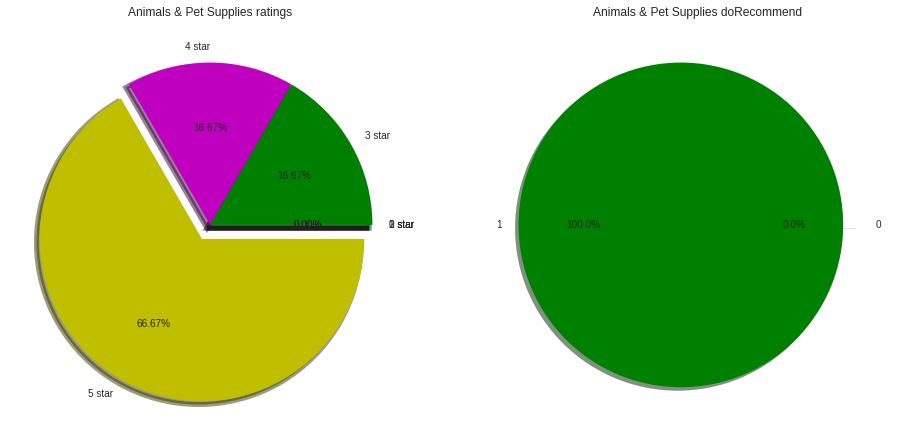

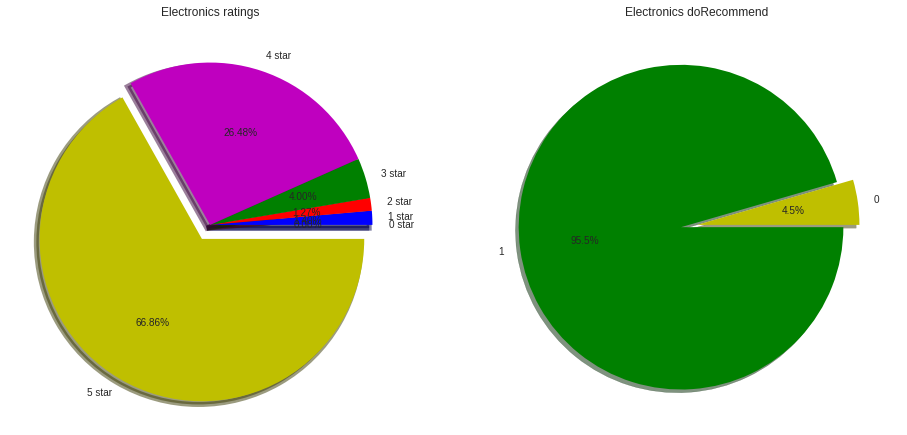

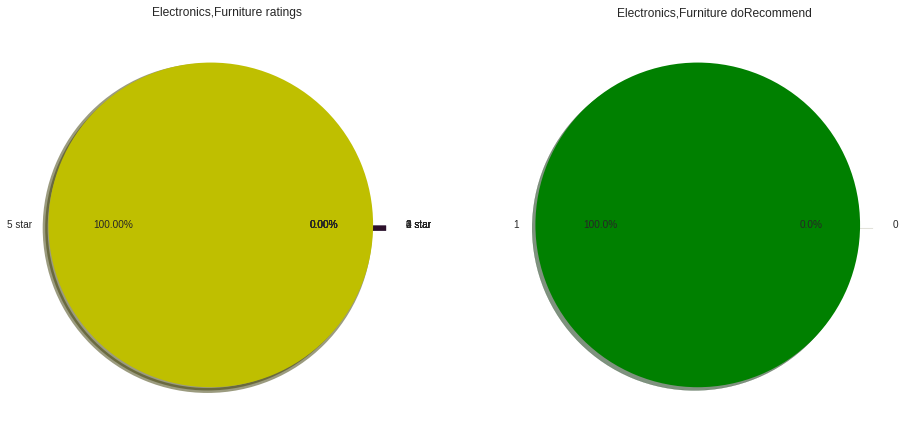

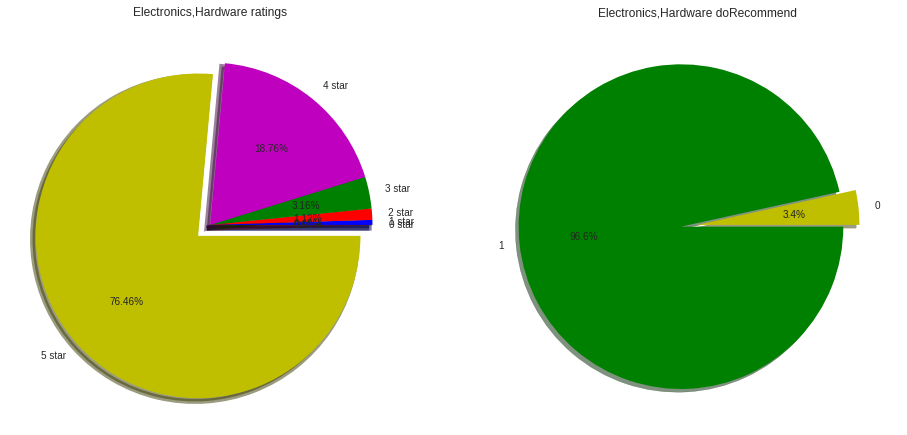

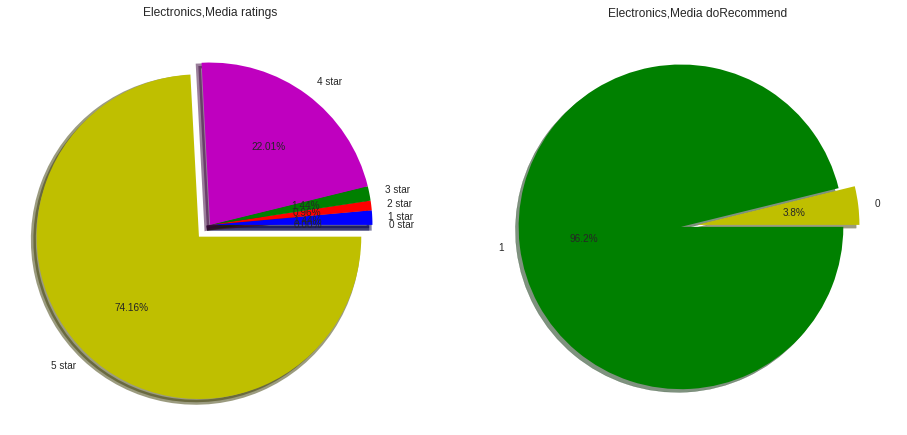

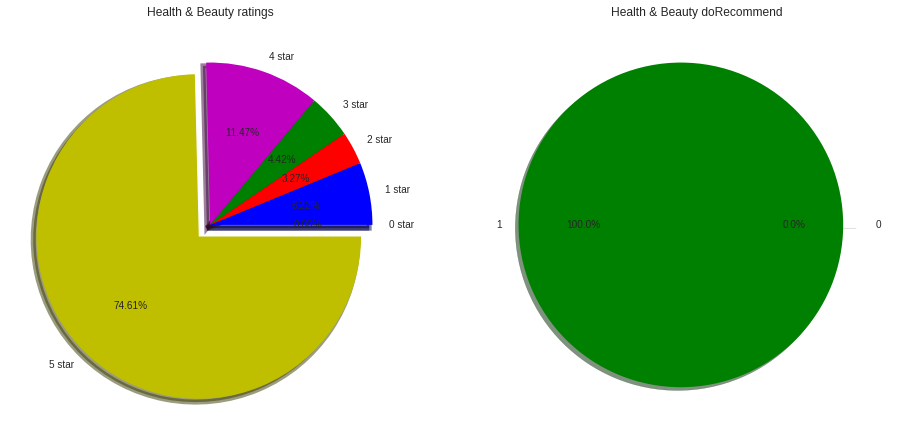

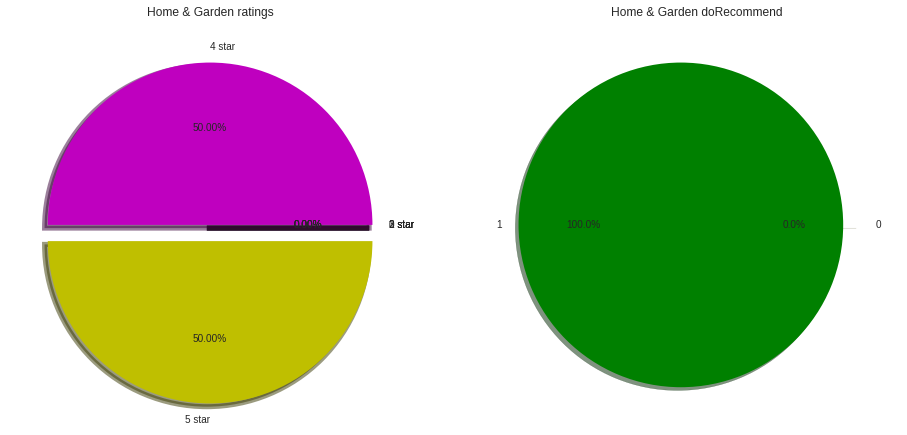

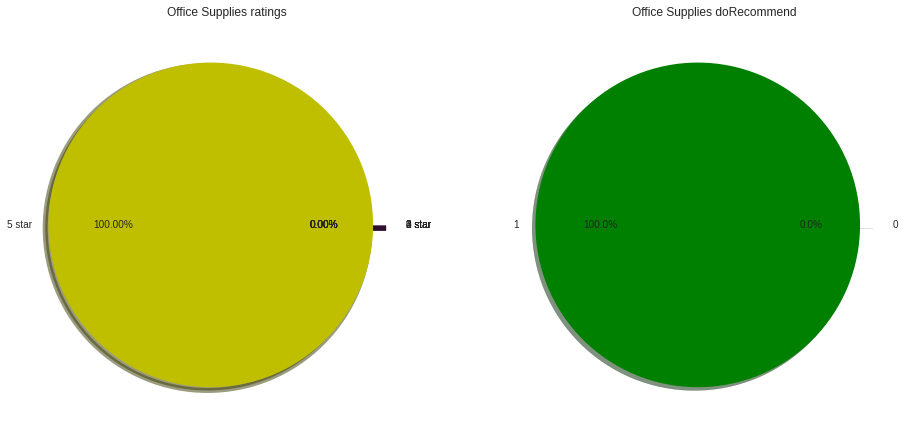

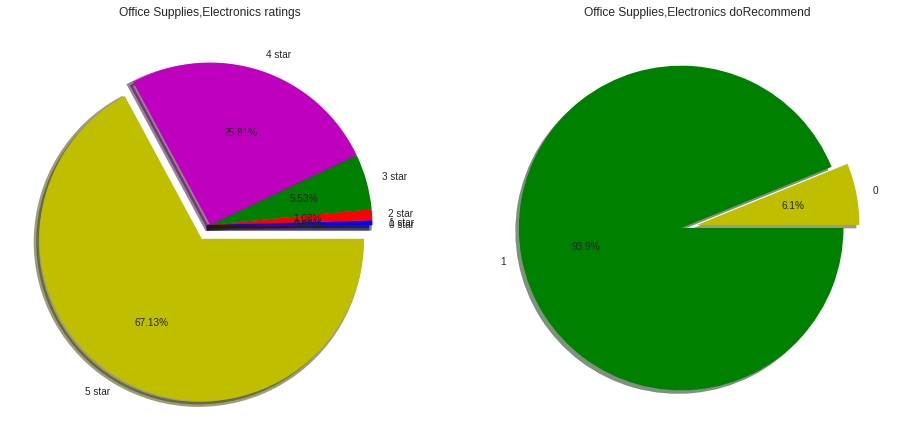

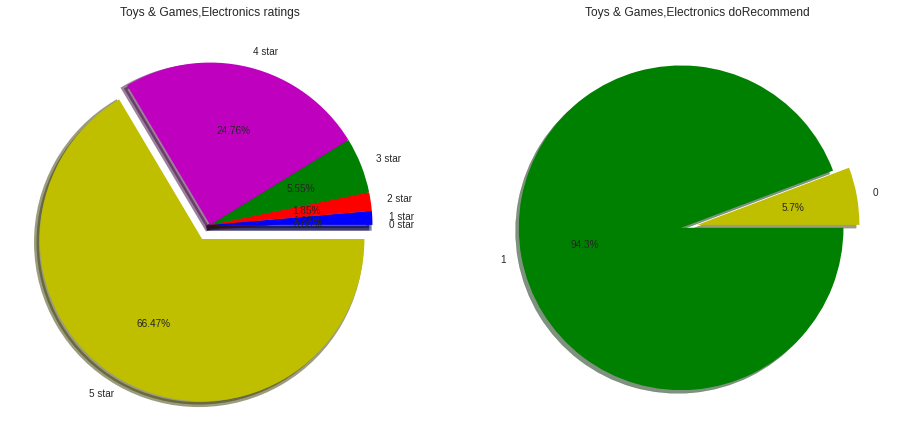

In [84]:
def draw_pie(kc,title=None):

    fig = plt.figure(1, figsize=(16, 14))

    count=[]
    labels=[]
    for i in range(max(kc['rating'])+1):
        labels.append(f'{i} star')
        count.append((kc['rating'] == i).sum())

    colors = ['b','b','r','g','m','y']
    explode = [0,0,0,0,0,0.1]
    plt.subplot(1,2,1)
    plt.pie(count, labels=labels, colors=colors, explode=explode,shadow=True,wedgeprops={'linewidth': 5, 'linestyle': 'solid', 'antialiased': True},autopct='%1.2f%%')
    plt.title(title)
    
    count=[]
    labels=[]
    for i in range(2):
        labels.append(i)
        count.append((kc['doRecommend'] == i).sum())

    colors=['y','g']
    plt.subplot(1,2,2)
    plt.pie(count, labels=labels, colors=colors, explode=[0,0.1],shadow=0.3,
            autopct='%1.1f%%')
    plt.title(f'{item} doRecommend')

    plt.show()


for item,kc in kc.groupby('primaryCategories'):
    draw_pie(kc, title=f'{item} ratings')

## hist plot

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33318 entries, 0 to 33317
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33318 non-null  object 
 1   dateAdded           33318 non-null  object 
 2   dateUpdated         33318 non-null  object 
 3   name                33318 non-null  object 
 4   asins               33318 non-null  object 
 5   brand               33318 non-null  object 
 6   primaryCategories   33318 non-null  object 
 7   manufacturer        33318 non-null  object 
 8   manufacturerNumber  33318 non-null  object 
 9   reviews.date        33318 non-null  object 
 10  reviews.dateSeen    33318 non-null  object 
 11  doRecommend         33318 non-null  object 
 12  numHelpful          33318 non-null  float64
 13  rating              33318 non-null  int64  
 14  reviews.text        33318 non-null  object 
 15  reviews.title       33318 non-null  object 
 16  revi

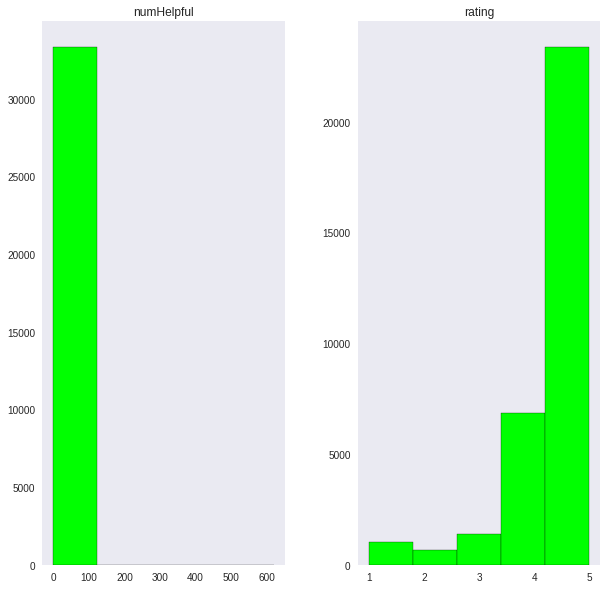

In [86]:
plot_features = [ 'numHelpful','rating']

p = data[plot_features].hist(figsize = (10,10), grid=False, bins=5,color='lime',edgecolor="black")

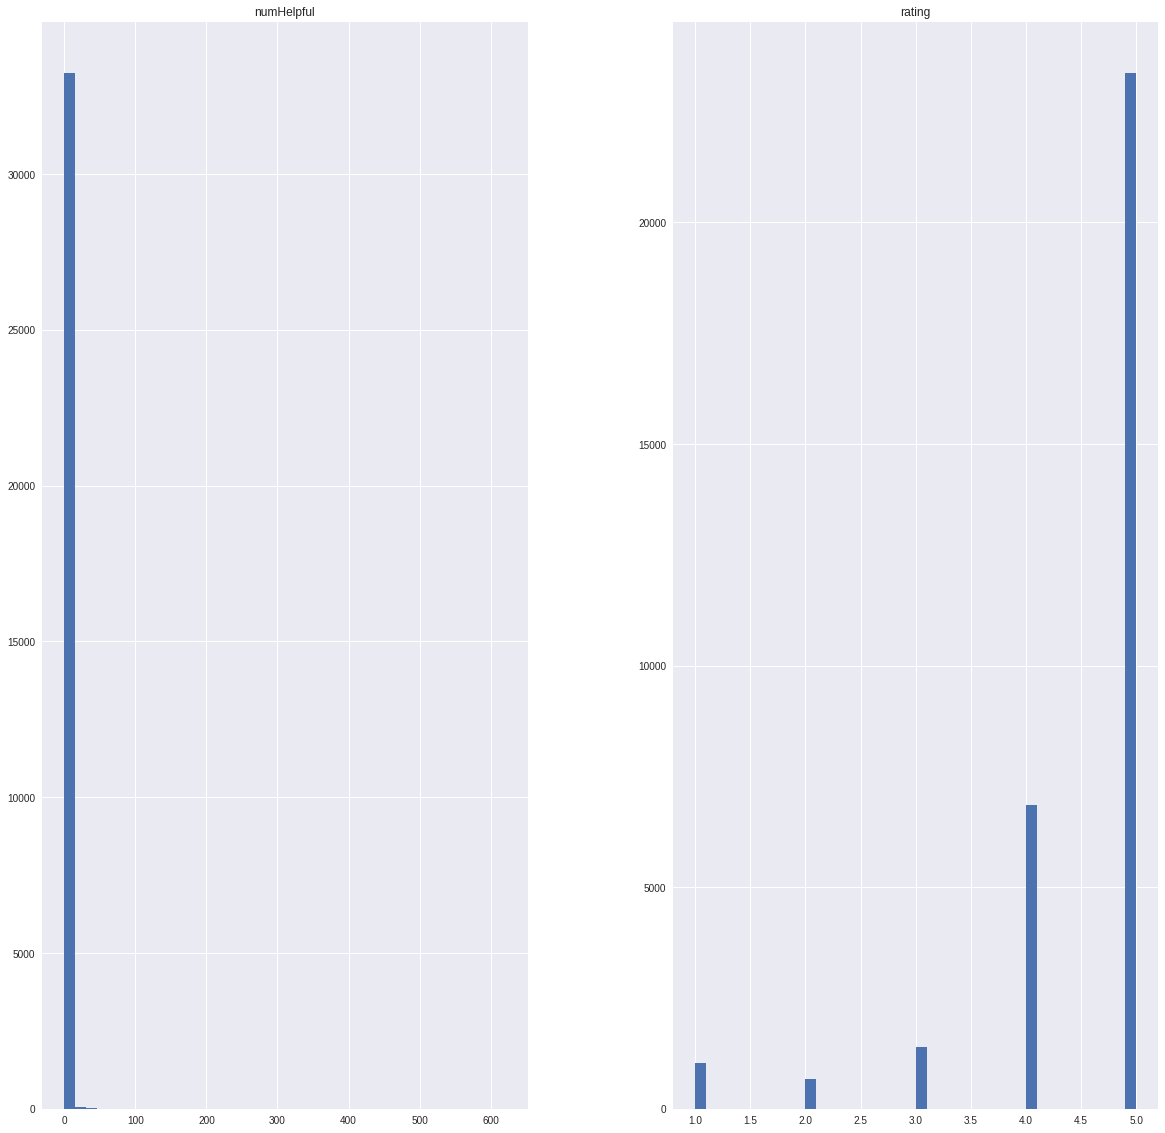

In [87]:
data.hist(bins=40 , figsize=(20,20)) #Pandas Hist function
plt.show()

# Endoding

In [88]:
data.isnull().sum()

id                    0
dateAdded             0
dateUpdated           0
name                  0
asins                 0
brand                 0
primaryCategories     0
manufacturer          0
manufacturerNumber    0
reviews.date          0
reviews.dateSeen      0
doRecommend           0
numHelpful            0
rating                0
reviews.text          0
reviews.title         0
reviews.username      0
dtype: int64

In [89]:
data['brand'].value_counts()

Amazon          21140
Amazonbasics    12178
Name: brand, dtype: int64

In [90]:
data['brand']=data['brand'].replace({'AmazonBasics':'Amazonbasics'})

In [91]:
Label_Encoder = LabelEncoder()
labels = Label_Encoder.fit_transform(data.brand)
data['brand'] = labels

In [92]:
labels = Label_Encoder.fit_transform(data.primaryCategories)
data['primaryCategories'] = labels

In [93]:
labels = Label_Encoder.fit_transform(data.manufacturer)
data['manufacturer'] = labels

In [94]:
labels = Label_Encoder.fit_transform(data.manufacturerNumber)
data['manufacturerNumber'] = labels

In [95]:
labels = Label_Encoder.fit_transform(data.doRecommend)
data['doRecommend'] = labels

In [96]:
data.rename(columns={'reviews.date': 'reviews_date', 'reviews.dateSeen': 'reviews_dateSeen'}, inplace=True)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33318 entries, 0 to 33317
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33318 non-null  object 
 1   dateAdded           33318 non-null  object 
 2   dateUpdated         33318 non-null  object 
 3   name                33318 non-null  object 
 4   asins               33318 non-null  object 
 5   brand               33318 non-null  int64  
 6   primaryCategories   33318 non-null  int64  
 7   manufacturer        33318 non-null  int64  
 8   manufacturerNumber  33318 non-null  int64  
 9   reviews_date        33318 non-null  object 
 10  reviews_dateSeen    33318 non-null  object 
 11  doRecommend         33318 non-null  int64  
 12  numHelpful          33318 non-null  float64
 13  rating              33318 non-null  int64  
 14  reviews.text        33318 non-null  object 
 15  reviews.title       33318 non-null  object 
 16  revi

In [98]:
data.sample(5)

,id,dateAdded,dateUpdated,name,asins,brand,primaryCategories,manufacturer,manufacturerNumber,reviews_date,reviews_dateSeen,doRecommend,numHelpful,rating,reviews.text,reviews.title,reviews.username
23491,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2019-03-03T02:47:22Z,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",B018Y22BI4,0,1,0,20,2017-05-03T00:00:00.000Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",1,0.0,5,"I have bought the cheaper tablets for my kids,...",Great tablet,Spot
24549,AVwjfXp4QMlgsOJE8qmk,2017-05-20T01:34:04Z,2019-02-25T02:23:15Z,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",B01J94SBEY,0,1,0,34,2017-11-03T00:00:00.000Z,2018-05-27T00:00:00Z,0,0.0,2,I have always bought nabi's they have lasted f...,breaks easily,dotvos
346,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,0,3,0,51,2017-12-16T00:00:00.000Z,2018-04-26T00:00:00Z,1,0.0,5,I love the show. It was so easy to set up. I u...,Great upgrade frpm the dot,blue
12102,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",1,5,3,64,2016-07-02T00:00:00.000Z,2017-08-28T00:00:00Z,1,0.0,5,So far these batteries are just as great as ot...,"So far, so good!",ByRachel
14009,AVpe7xlELJeJML43ypLz,2015-12-03T01:23:41Z,2019-04-24T02:17:42Z,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",1,5,3,66,2016-04-20T00:00:00.000Z,2017-06-28T00:00:00Z,1,0.0,5,came fast and was exactly what i wanted !!,Five Stars,Byjason blinzley


In [99]:
data.head()

,id,dateAdded,dateUpdated,name,asins,brand,primaryCategories,manufacturer,manufacturerNumber,reviews_date,reviews_dateSeen,doRecommend,numHelpful,rating,reviews.text,reviews.title,reviews.username
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2017-09-03T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",0,0.0,3,I thought it would be as big as small paper bu...,Too small,llyyue
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2017-06-06T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",1,0.0,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2018-04-20T00:00:00.000Z,2018-05-27T00:00:00Z,1,0.0,4,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2017-11-02T17:33:31.000Z,2018-10-09T00:00:00Z,1,3.0,5,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2018-04-24T00:00:00.000Z,2018-05-27T00:00:00Z,1,0.0,5,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack


In [100]:
data['key'] = 0

In [101]:
for i in range(0,data.shape[0]):
  data.iloc[ [i] , [17]  ] = i


In [102]:
data['asins'].value_counts()

B00QWO9P0O,B00LH3DMUO               8342
B00QWO9P0O,B01IB83NZG,B00MNV8E0C    3728
B018T075DC                          2443
B018SZT3BK,B01AHB9CN2               2370
B018Y22C2Y                          1986
                                    ... 
B00QAVO43C                             1
B00OP6SMCI                             1
B00VKTZFB4                             1
B01L7XWEQQ                             1
B010RLCH2U                             1
Name: asins, Length: 70, dtype: int64

In [103]:
data.shape

(33318, 18)

## heat map

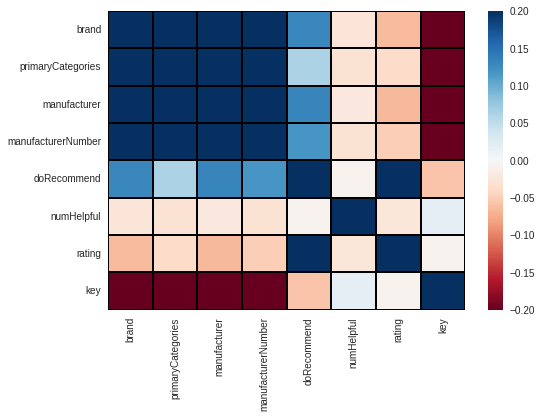

In [104]:
sns.heatmap(data.corr(), vmin=-0.2, vmax= 0.2,linecolor='black',cmap='RdBu',linewidths='1')

## box plot

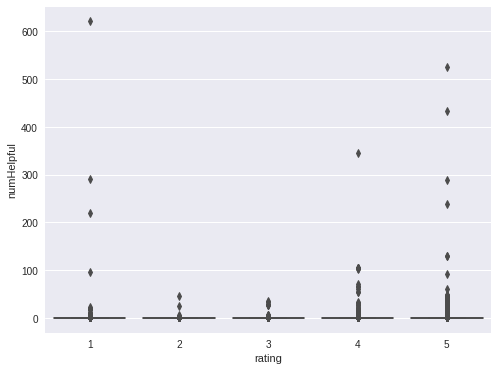

In [105]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data.rating, y=data.numHelpful)

# SENTIMENTAL ANALYSIS

In [106]:
senti_data = data[['reviews.text', 'rating', 'key']]
senti_data.head()

,reviews.text,rating,key
0,I thought it would be as big as small paper bu...,3,0
1,This kindle is light and easy to use especiall...,5,1
2,Didnt know how much i'd use a kindle so went f...,4,2
3,I am 100 happy with my purchase. I caught it o...,5,3
4,Solid entry level Kindle. Great for kids. Gift...,5,4


In [107]:
senti_data.isnull().sum()

reviews.text    0
rating          0
key             0
dtype: int64

In [108]:
print(data['reviews.text'][0])

I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.


In [109]:
senti_data['rating'].value_counts().sort_index(ascending = False)

5    23362
4     6856
3     1402
2      670
1     1028
Name: rating, dtype: int64

In [110]:
score = {1:0, 2:0, 3:0, 4:1, 5:1}

sentiment = {0: 'Negative', 1: 'Positive'}

senti_data['score'] = senti_data['rating'].map(score)
senti_data['sentiment'] = senti_data['score'].map(sentiment)

senti_data.head()

,reviews.text,rating,key,score,sentiment
0,I thought it would be as big as small paper bu...,3,0,0,Negative
1,This kindle is light and easy to use especiall...,5,1,1,Positive
2,Didnt know how much i'd use a kindle so went f...,4,2,1,Positive
3,I am 100 happy with my purchase. I caught it o...,5,3,1,Positive
4,Solid entry level Kindle. Great for kids. Gift...,5,4,1,Positive


In [111]:
words_used = ' '.join(senti_data['reviews.text'])
words_used = pd.Series(words_used.split())
words_used


0               I
1         thought
2              it
3           would
4              be
           ...   
889334         to
889335     anyone
889336         on
889337          a
889338    budget.
Length: 889339, dtype: object

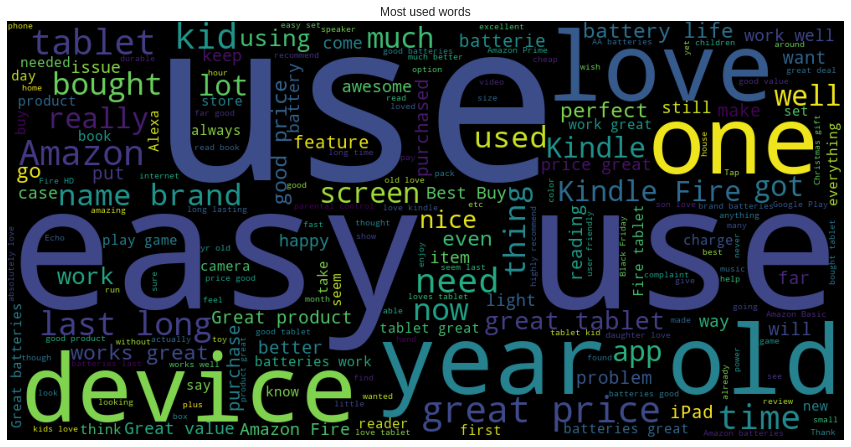

In [112]:
most_wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words_used))

plt.figure(figsize=(15,8))

plt.imshow(most_wordcloud)
plt.title("Most used words")

plt.axis("off")
plt.show()

In [113]:
positive_words = pd.Series(' '.join(senti_data[ senti_data['sentiment'] == 'Positive']['reviews.text']).split() )
positive_words

0            This
1          kindle
2              is
3           light
4             and
           ...   
776319         to
776320     anyone
776321         on
776322          a
776323    budget.
Length: 776324, dtype: object

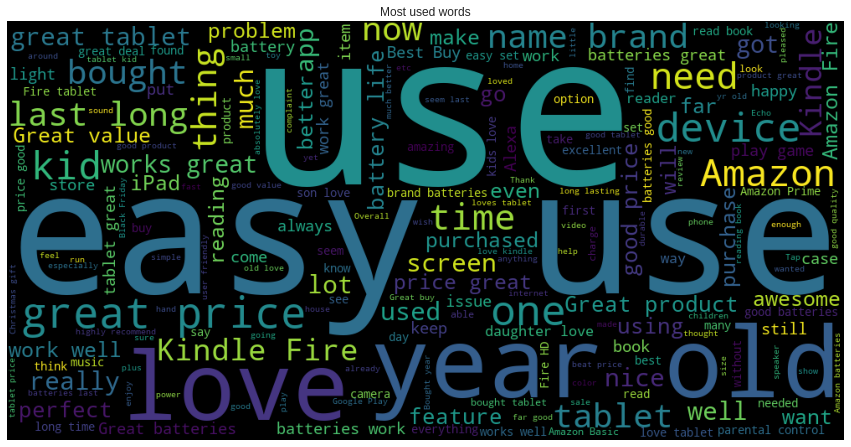

In [114]:
most_wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words))

plt.figure(figsize=(15,8))

plt.imshow(most_wordcloud)
plt.title("Most used words")

plt.axis("off")
plt.show()

In [115]:
negative_words = pd.Series(' '.join(senti_data[ senti_data['sentiment'] == 'Negative']['reviews.text']).split() )
negative_words

0               I
1         thought
2              it
3           would
4              be
           ...   
113010         at
113011          a
113012       very
113013       good
113014     price.
Length: 113015, dtype: object

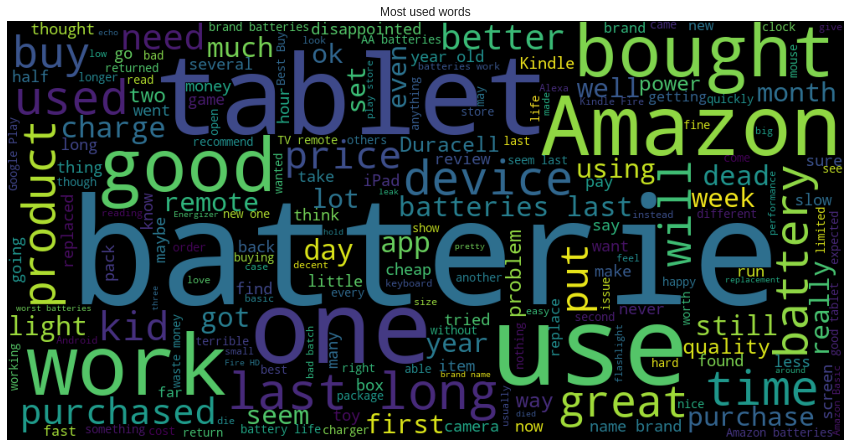

In [116]:
most_wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words))

plt.figure(figsize=(15,8))

plt.imshow(most_wordcloud)
plt.title("Most used words")

plt.axis("off")
plt.show()

### Text Processing

In [117]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('averaged_perceptron_tagger')

import nltk
nltk.download('wordnet')

#cleaning


def clean_text(text:str):
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text


# remove stopwords

def remove_stopwords(text:str):
    """ Remove stopwords from text:
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    filtered_sentence = []

    # Stop word lists can be adjusted for your problem
    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text


#streaming

def stemm_text(text:str):
    """ Stemm text:
    ------
    input: text (str)    
    output: Stemmed text (str)
    """
    text = str(text)
    # Initialize the stemmer
    snow = SnowballStemmer('english')

    stemmed_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        # Stem the word/token
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)
    
    return text

#Lemmatization

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def lemmatize(text:str):
    """ lemmatize text:
    ------
    input: text (str)    
    output: lemmatized text (str)
    """
    text = str(text)
    
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [118]:
#applying

senti_data['text'] = senti_data['reviews.text'].apply(clean_text)

senti_data['text'] = senti_data['text'].apply(remove_stopwords)
senti_data['text'] = senti_data['text'].apply(lemmatize)

senti_data['text']

0        i think would be as big a small paper but turn...
1                kindle light easy use especially at beach
2        didnt know how much i d use kindle so go for l...
3        i be happy with my purchase i catch on sale at...
4        solid entry level kindle great for kid gift fo...
                               ...                        
33313    i get of these for my yr old twin my yr old ha...
33314    i buy for my niece for christmas gift she year...
33315    very nice for light internet browse keep on to...
33316    tablet do absolutely everything i want i can w...
33317    at ninety dollar expectionations be low but st...
Name: text, Length: 33318, dtype: object

In [119]:
senti_data[senti_data['text'].isnull()]

,reviews.text,rating,key,score,sentiment,text


In [120]:
#####Feature Engineering and Selection

vectorizer = TfidfVectorizer(max_features=800)
vectorizer.fit(senti_data['text'])
features = vectorizer.transform(senti_data['text'])

features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26721878, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [121]:

final = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())

final['senti_score'] = senti_data['score']
final['key'] = senti_data['key']
final

,100,aa,aaa,ability,able,about,absolutely,access,account,actually,ad,add,addition,additional,adjust,adult,advertised,affordable,after,again,age,ago,alexa,alkaline,all,allow,almost,along,alot,already,also,alternative,although,always,amaze,amazing,amazon,amazonbasics,amount,android,...,when,where,which,while,white,who,whole,why,wife,wifi,will,win,wireless,wish,with,within,without,wonderful,word,work,world,worry,worth,would,wouldn,wrap,wrong,xbox,year,yes,yet,you,young,your,youtube,yr,äôs,äôt,senti_score,key
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.281248,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1,1
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.164338,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1,2
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.091959,0.0,0.0,0.098448,0.0,0.0,0.0,0.0,0.0,0.113101,0.0,0.0,0.162846,0.0,0.100126,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.072678,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1,3
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33313,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.562853,0.0,0.0,1,33313
33314,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.266134,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1,33314
33315,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.148471,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1,33315
33316,0.267219,0.0,0.0,0.0,0.0,0.0,0.214273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133085,

In [122]:
data_final = pd.merge(data, final, on = 'key')

In [123]:
data_final

,id,dateAdded,dateUpdated,name_x,asins,brand_x,primaryCategories,manufacturer,manufacturerNumber,reviews_date,reviews_dateSeen,doRecommend,numHelpful,rating,reviews.text,reviews.title,reviews.username,key,100,aa,aaa,ability,able,about,absolutely,access,account,actually,ad,add,addition,additional,adjust,adult,advertised,affordable,after,again,age,ago,...,what,when,where,which,while,white,who,whole,why,wife,wifi,will,win,wireless,wish,with,within,without,wonderful,word,work,world,worry,worth,would,wouldn,wrap,wrong,xbox,year,yes,yet,you,young,your,youtube,yr,äôs,äôt,senti_score
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2017-09-03T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",0,0.0,3,I thought it would be as big as small paper bu...,Too small,llyyue,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.281248,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2017-06-06T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",1,0.0,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2018-04-20T00:00:00.000Z,2018-05-27T00:00:00Z,1,0.0,4,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.164338,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2017-11-02T17:33:31.000Z,2018-10-09T00:00:00Z,1,3.0,5,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.091959,0.0,0.0,0.098448,0.0,0.0,0.0,0.0,0.0,0.113101,0.0,0.0,0.162846,0.0,0.100126,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.072678,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2018-04-24T00:00:00.000Z,2018-05-27T00:00:00Z,1,0.0,5,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33313,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,

In [124]:
data_final.drop('key', inplace=True, axis=1)

In [125]:
data_final.drop('reviews.text', inplace=True, axis=1)

In [126]:
data_final.drop('reviews.title', inplace=True, axis=1)

In [127]:
data_final

,id,dateAdded,dateUpdated,name_x,asins,brand_x,primaryCategories,manufacturer,manufacturerNumber,reviews_date,reviews_dateSeen,doRecommend,numHelpful,rating,reviews.username,100,aa,aaa,ability,able,about,absolutely,access,account,actually,ad,add,addition,additional,adjust,adult,advertised,affordable,after,again,age,ago,alexa,alkaline,all,...,what,when,where,which,while,white,who,whole,why,wife,wifi,will,win,wireless,wish,with,within,without,wonderful,word,work,world,worry,worth,would,wouldn,wrap,wrong,xbox,year,yes,yet,you,young,your,youtube,yr,äôs,äôt,senti_score
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2017-09-03T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",0,0.0,3,llyyue,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.281248,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2017-06-06T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",1,0.0,5,Charmi,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2018-04-20T00:00:00.000Z,2018-05-27T00:00:00Z,1,0.0,4,johnnyjojojo,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.164338,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2017-11-02T17:33:31.000Z,2018-10-09T00:00:00Z,1,3.0,5,Kdperry,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069287,...,0.0,0.0,0.0,0.091959,0.0,0.0,0.098448,0.0,0.0,0.0,0.0,0.0,0.113101,0.0,0.0,0.162846,0.0,0.100126,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.072678,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,0,1,0,49,2018-04-24T00:00:00.000Z,2018-05-27T00:00:00Z,1,0.0,5,Johnnyblack,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33313,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,0,1,0,16,2016-12-07T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",1,0.0,5,Mom2twinsplus1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000